# WELCOME

Importing library files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

# DATA INGESTION /LOADING

In [2]:
df=pd.read_csv(r'data.csv')

In [3]:
df.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56


In [4]:
# checking for duplicates
df.drop_duplicates()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121


In [5]:
df.describe()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
count,182.000000,182.00000,182.000000,182.000000,182.000000
mean,24375.000000,27.50000,55.000000,250.000000,94.071429
std,15197.252769,7.52069,15.041379,90.248276,65.171006
min,5000.000000,15.00000,30.000000,100.000000,12.000000
25%,9375.000000,21.00000,42.000000,172.000000,42.000000
50%,21875.000000,27.50000,55.000000,250.000000,80.000000
75%,39375.000000,34.00000,68.000000,328.000000,128.750000
max,50000.000000,40.00000,80.000000,400.000000,320.000000


In [6]:
df.shape

(182, 5)

In [7]:
df['Number of Barriers'].value_counts()

32     5
28     5
24     4
48     4
134    3
      ..
37     1
23     1
256    1
242    1
128    1
Name: Number of Barriers, Length: 122, dtype: int64

In [8]:
#checking for thr null values with their sum
df.isna().sum()

Area                      0
Sensing Range             0
Transmission Range        0
Number of Sensor nodes    0
Number of Barriers        0
dtype: int64

# EDA

checking for the missing data with the the help of heatmap

<Axes: >

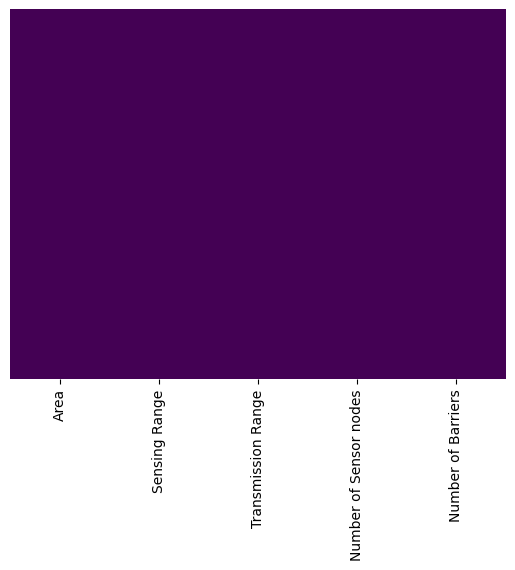

In [10]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing data found in heatmap

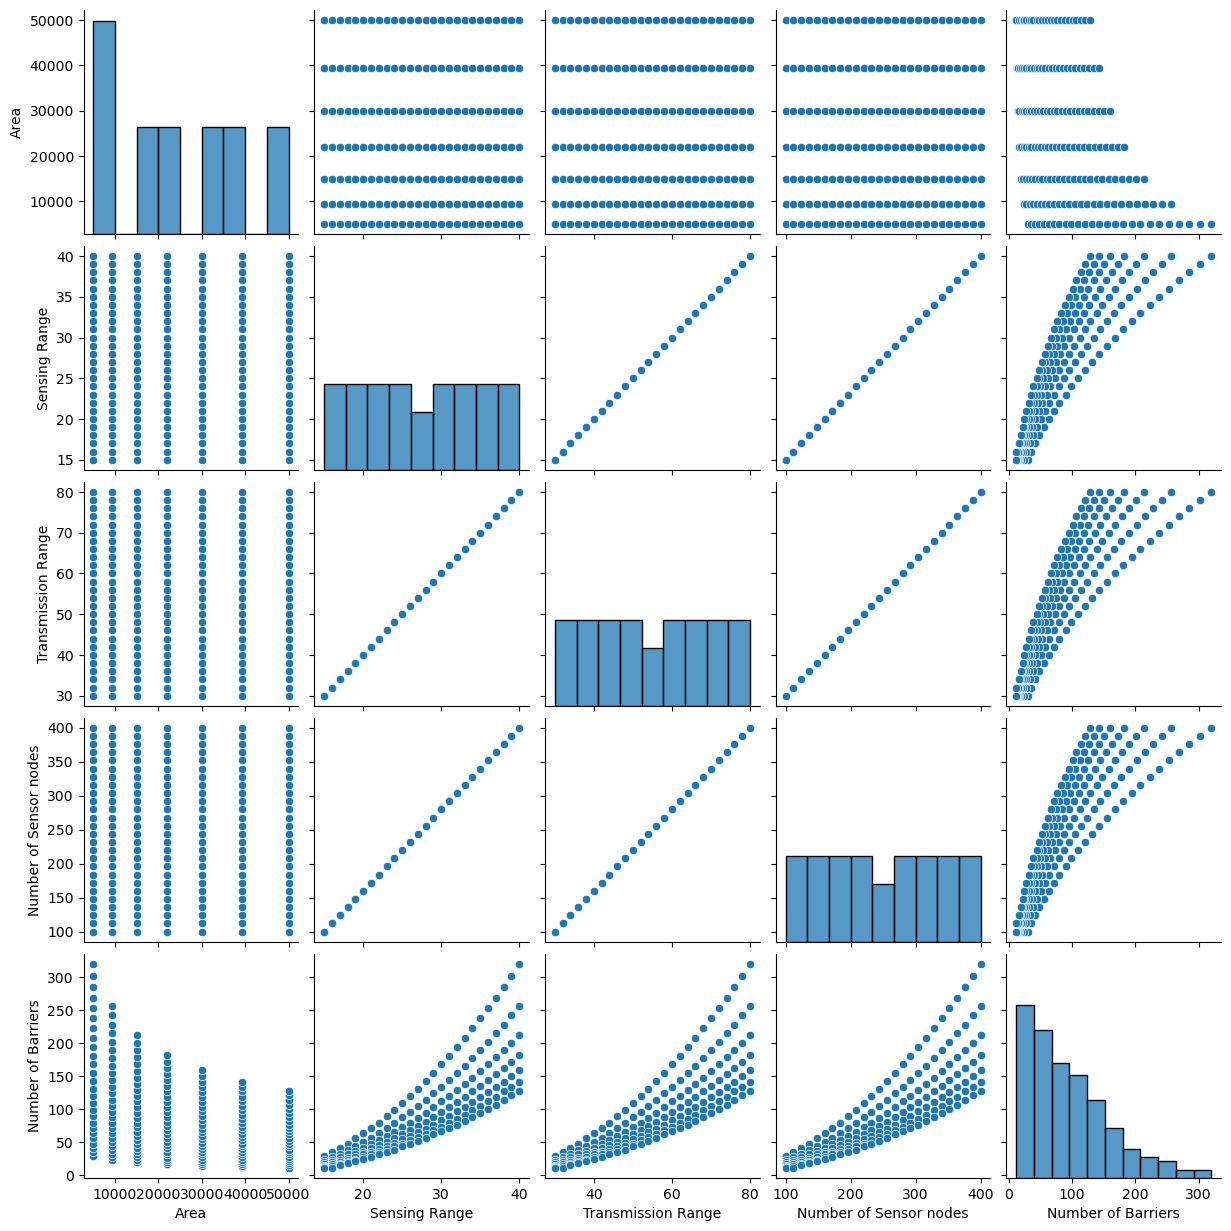

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df.corr()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
Area,1.000000e+00,3.095077e-16,3.095077e-16,-1.162999e-16,-0.423438
Sensing Range,3.095077e-16,1.000000e+00,1.000000e+00,1.000000e+00,0.838365
Transmission Range,3.095077e-16,1.000000e+00,1.000000e+00,1.000000e+00,0.838365
Number of Sensor nodes,-1.162999e-16,1.000000e+00,1.000000e+00,1.000000e+00,0.838365
Number of Barriers,-4.234383e-01,8.383655e-01,8.383655e-01,8.383655e-01,1.000000


<Axes: >

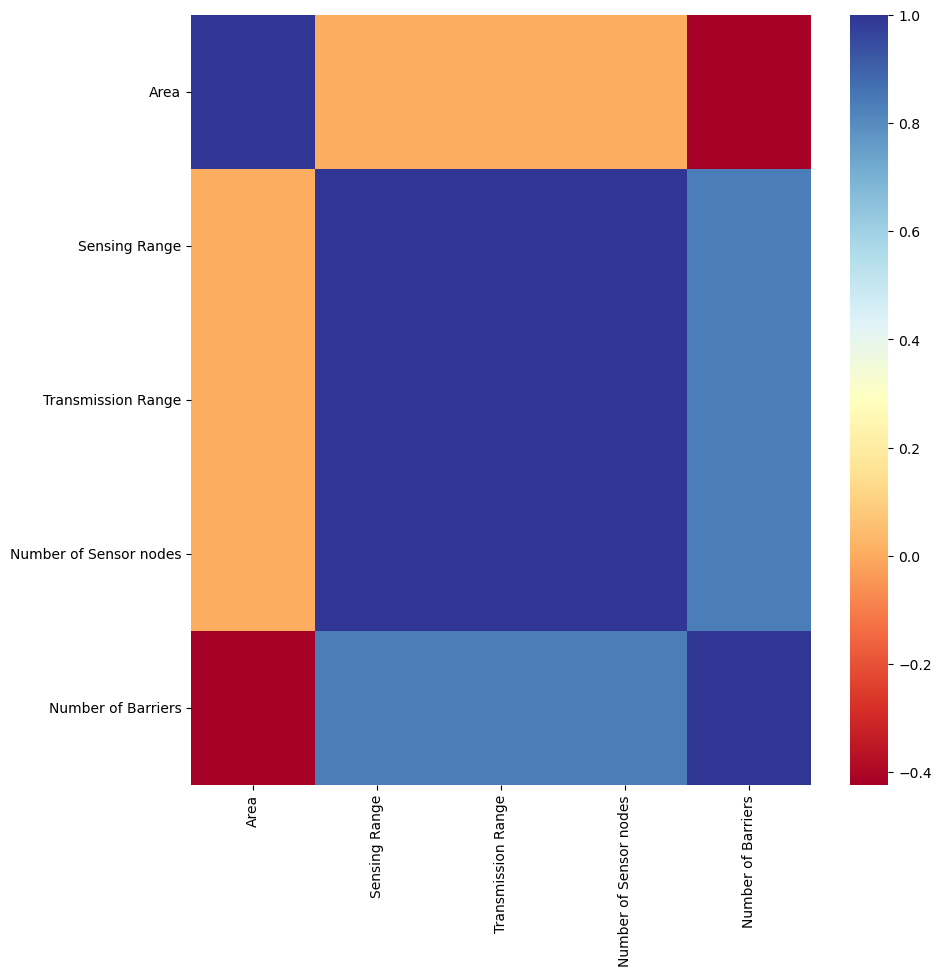

In [13]:
%matplotlib inline
fig, ax = plt.subplots(figsize= (10,10))
sns.heatmap(df.corr(), cmap = "RdYlBu")

Data processing

# APPLYING Models

Models for anomaly detection


# DBCAN Model

In [14]:
scaler= StandardScaler()
df_s = scaler.fit_transform(df)
df_norm = pd.DataFrame(normalize(df_s))

In [15]:
df_reduce = df_s[:, :10]
db_model = DBSCAN(eps = 0.05, min_samples = 10)
clusters = db_model.fit_predict(df)


In [16]:
df['Cluster'] = clusters

In [17]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

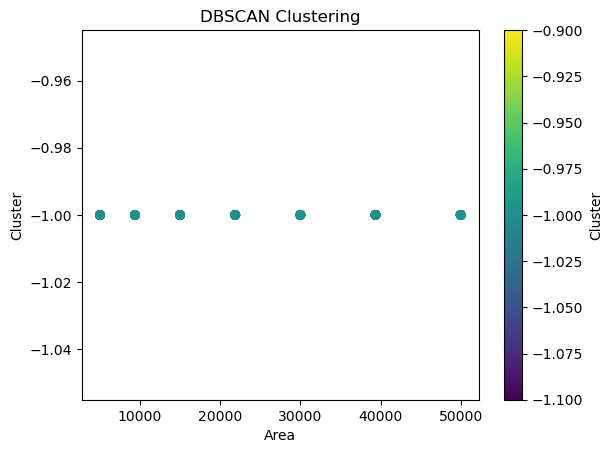

In [18]:
# Visualize the clusters
plt.scatter(df['Area'], df['Cluster'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Area')
plt.ylabel('Cluster')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

# one class SVM

In [19]:

from sklearn.svm import OneClassSVM

In [20]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu=0.1).fit(df)
y_pred= model.predict(df == -1)

In [21]:
is_anomaly = np.concatenate((np.zeros(len(df),dtype=int),(y_pred== -1).astype(int)))

In [22]:
df['is_anomaly']= is_anomaly[:182]

In [23]:
is_anomaly

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
df.head(10)

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers,Cluster,is_anomaly
0,5000,15,30,100,30,-1,0
1,5000,16,32,112,35,-1,0
2,5000,17,34,124,42,-1,0
3,5000,18,36,136,48,-1,0
4,5000,19,38,148,56,-1,0
5,5000,20,40,160,64,-1,0
6,5000,21,42,172,72,-1,0
7,5000,22,44,184,80,-1,0
8,5000,23,46,196,90,-1,0
9,5000,24,48,208,99,-1,0


# Isolation forest Model

In [25]:
from sklearn.ensemble import IsolationForest


# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset

# Fit the model on the selected features
isolation_forest.fit(df)

# Predict outliers/anomalies
anomaly_preds = isolation_forest.predict(df)

# Add the anomaly predictions to your DataFrame for further analysis or visualization
df['is_anomaly'] = anomaly_preds

# Filter out the anomaly for further analysis or action
anomaly = df[df['is_anomaly'] == 1] # 1 indicates an anomaly


In [26]:
anomaly

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers,Cluster,is_anomaly
1,5000,16,32,112,35,-1,1
2,5000,17,34,124,42,-1,1
3,5000,18,36,136,48,-1,1
4,5000,19,38,148,56,-1,1
5,5000,20,40,160,64,-1,1
...,...,...,...,...,...,...,...
176,50000,35,70,340,95,-1,1
177,50000,36,72,352,101,-1,1
178,50000,37,74,364,107,-1,1
179,50000,38,76,376,114,-1,1


<Axes: xlabel='is_anomaly', ylabel='count'>

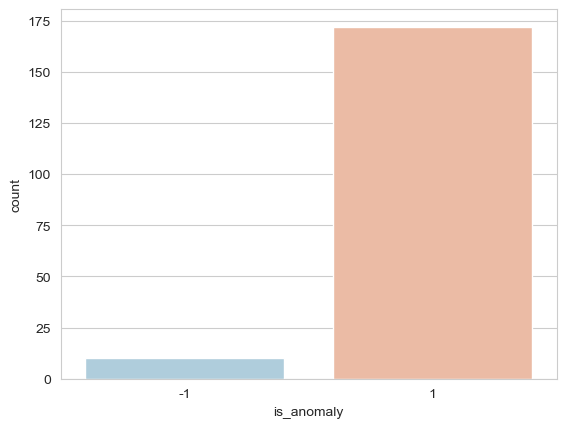

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='is_anomaly',data=df,palette='RdBu_r')

<Axes: xlabel='is_anomaly', ylabel='count'>

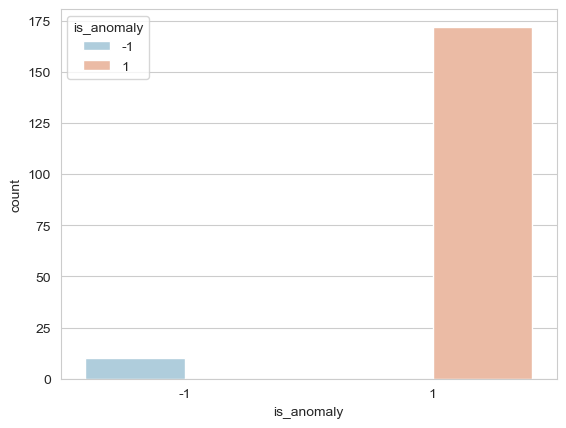

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='is_anomaly',hue='is_anomaly',data=df,palette='RdBu_r')

# LOF model

In [29]:
from sklearn.neighbors import LocalOutlierFactor

In [30]:
# Create and fit the LOF model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
Anomaly_Score = lof_model.fit_predict(df)

In [31]:

# Add outlier scores to the DataFrame
df['Anomaly_Score'] = -lof_model.negative_outlier_factor_



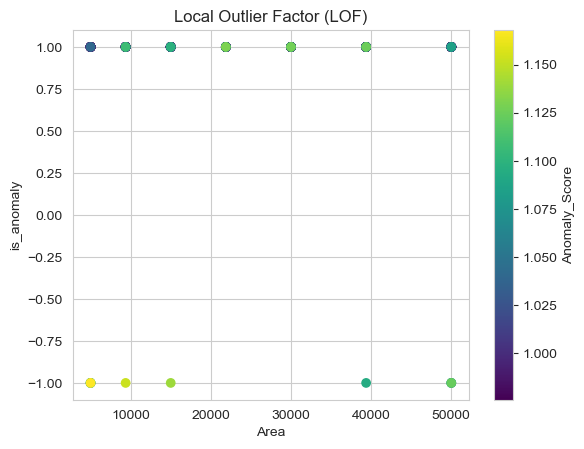

In [32]:
# Visualize the outlier scores
plt.scatter(df['Area'], df['is_anomaly'], c=df['Anomaly_Score'], cmap='viridis')
plt.xlabel('Area')
plt.ylabel('is_anomaly')
plt.title('Local Outlier Factor (LOF)')
plt.colorbar(label='Anomaly_Score')
plt.show()

In [33]:
df.tail(20)

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers,Cluster,is_anomaly,Anomaly_Score
162,50000,21,42,172,28,-1,1,0.981972
163,50000,22,44,184,32,-1,1,0.985765
164,50000,23,46,196,36,-1,1,0.989557
165,50000,24,48,208,39,-1,1,0.993235
166,50000,25,50,220,44,-1,1,0.997137
167,50000,26,52,232,48,-1,1,0.986576
168,50000,27,54,244,52,-1,1,0.981110
169,50000,28,56,256,57,-1,1,0.981146
170,50000,29,58,268,62,-1,1,0.986602
171,50000,30,60,280,67,-1,1,0.997396


# Statistical Methods

In [34]:
import pandas as pd
import numpy as np


# Compute z-scores for the data
z_scores = (df- np.mean(df)) / np.std(df)

# Set a threshold for anomaly detection based on z-score
threshold = 3  # Adjust the threshold as needed

# Detect anomalies based on the threshold
anomalies = df[np.abs(z_scores) > threshold]

# Print the detected anomalies
print("Detected Anomalies:")
print(anomalies)



Detected Anomalies:
     Area  Sensing Range  Transmission Range  Number of Sensor nodes  \
0     NaN            NaN                 NaN                     NaN   
1     NaN            NaN                 NaN                     NaN   
2     NaN            NaN                 NaN                     NaN   
3     NaN            NaN                 NaN                     NaN   
4     NaN            NaN                 NaN                     NaN   
..    ...            ...                 ...                     ...   
177   NaN            NaN                 NaN                     NaN   
178   NaN            NaN                 NaN                     NaN   
179   NaN            NaN                 NaN                     NaN   
180   NaN            NaN                 NaN                     NaN   
181   NaN            NaN                 NaN                     NaN   

     Number of Barriers  Cluster  is_anomaly  Anomaly_Score  
0                   NaN      NaN        -1.0         

C:\Users\shaik\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [35]:
anomalies

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers,Cluster,is_anomaly,Anomaly_Score
0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Logistic Regression



Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [36]:
from sklearn.model_selection import train_test_split


In [74]:
X=df
y=Anomaly_Score

** Train and fit a logistic regression model on the training set.**

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression(penalty="l2",multi_class="ovr")
logmodel.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

Predictions and Evaluations

** Now predict values for the testing data.**

In [78]:
predictions = logmodel.predict(X_test)

In [79]:
from sklearn.metrics import classification_report

** Create a classification report for the model.**

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       1.00      0.25      0.40         4
           1       0.95      1.00      0.97        57

    accuracy                           0.95        61
   macro avg       0.97      0.62      0.69        61
weighted avg       0.95      0.95      0.94        61



In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9508196721311475

In [82]:
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:",test_accuracy)

Test Accuracy: 0.9508196721311475


hyperparameter tuning for LogisticRegression

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume X_train, y_train are your training data and labels
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the logistic regression model
logreg = LogisticRegression()

# Define hyperparameters and their possible values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Evaluate the model with the best hyperparameters on the validation set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test,y_test)


print("accuracy on Test Set:",accuracy)

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

accuracy on Test Set: 0.9344262295081968


C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

In [68]:
from sklearn.metrics import confusion_matrix 
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)

In [69]:
conf_matrix

array([[ 2,  1],
       [ 0, 34]], dtype=int64)

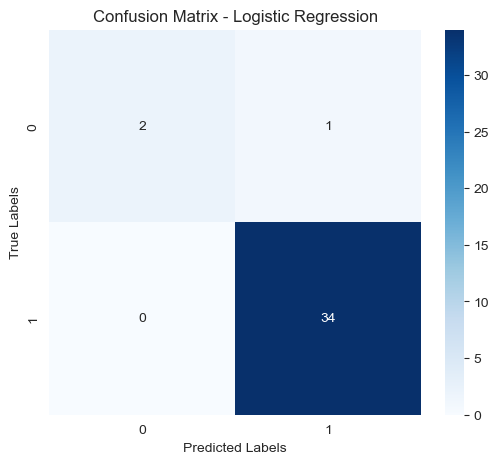

In [67]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [84]:
from sklearn.linear_model import LogisticRegression
m2=LogisticRegression().fit(X_train, y_train)
score = m2.score(X_test,y_test)
print(f'Mean square error: {score:.2f}')
#accuracy_score(m2,y_test)
print("Model Accuracy is {p}%".format(p =round (score*100, 2)))

Mean square error: 0.93
Model Accuracy is 93.44%


# GradientBoostingClassifier Model

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = gb_classifier.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Gradient Boosting Classifier:",accuracy)

Accuracy of Gradient Boosting Classifier: 1.0


hyperparameter tuning for GradientBoostingClassifier

In [86]:
# Define the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Define the hyperparameters grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the GradientBoostingClassifier with the best hyperparameters
best_gb_clf = GradientBoostingClassifier(**best_params)

# Fit the model using the best hyperparameters
best_gb_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = best_gb_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        57

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

# Thank you